<a href="https://colab.research.google.com/github/vidakpop/MAT-271-FINAL-PROJECT/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm



In [29]:
# Loading the dataset 
url='https://raw.githubusercontent.com/vidakpop/MAT-271-FINAL-PROJECT/main/data_house.csv'
df=pd.read_csv(url,encoding='unicode_escape')
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000,0.006718,0.027372,0.010794,0.107334,0.044717,-0.026877,0.179138,-0.007611,-0.013751,...,0.082050,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
id,0.006718,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,0.027372,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.010794,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.107334,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.044717,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.026877,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.179138,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.007611,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.013751,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


<ipython-input-12-8a07d7b88c23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


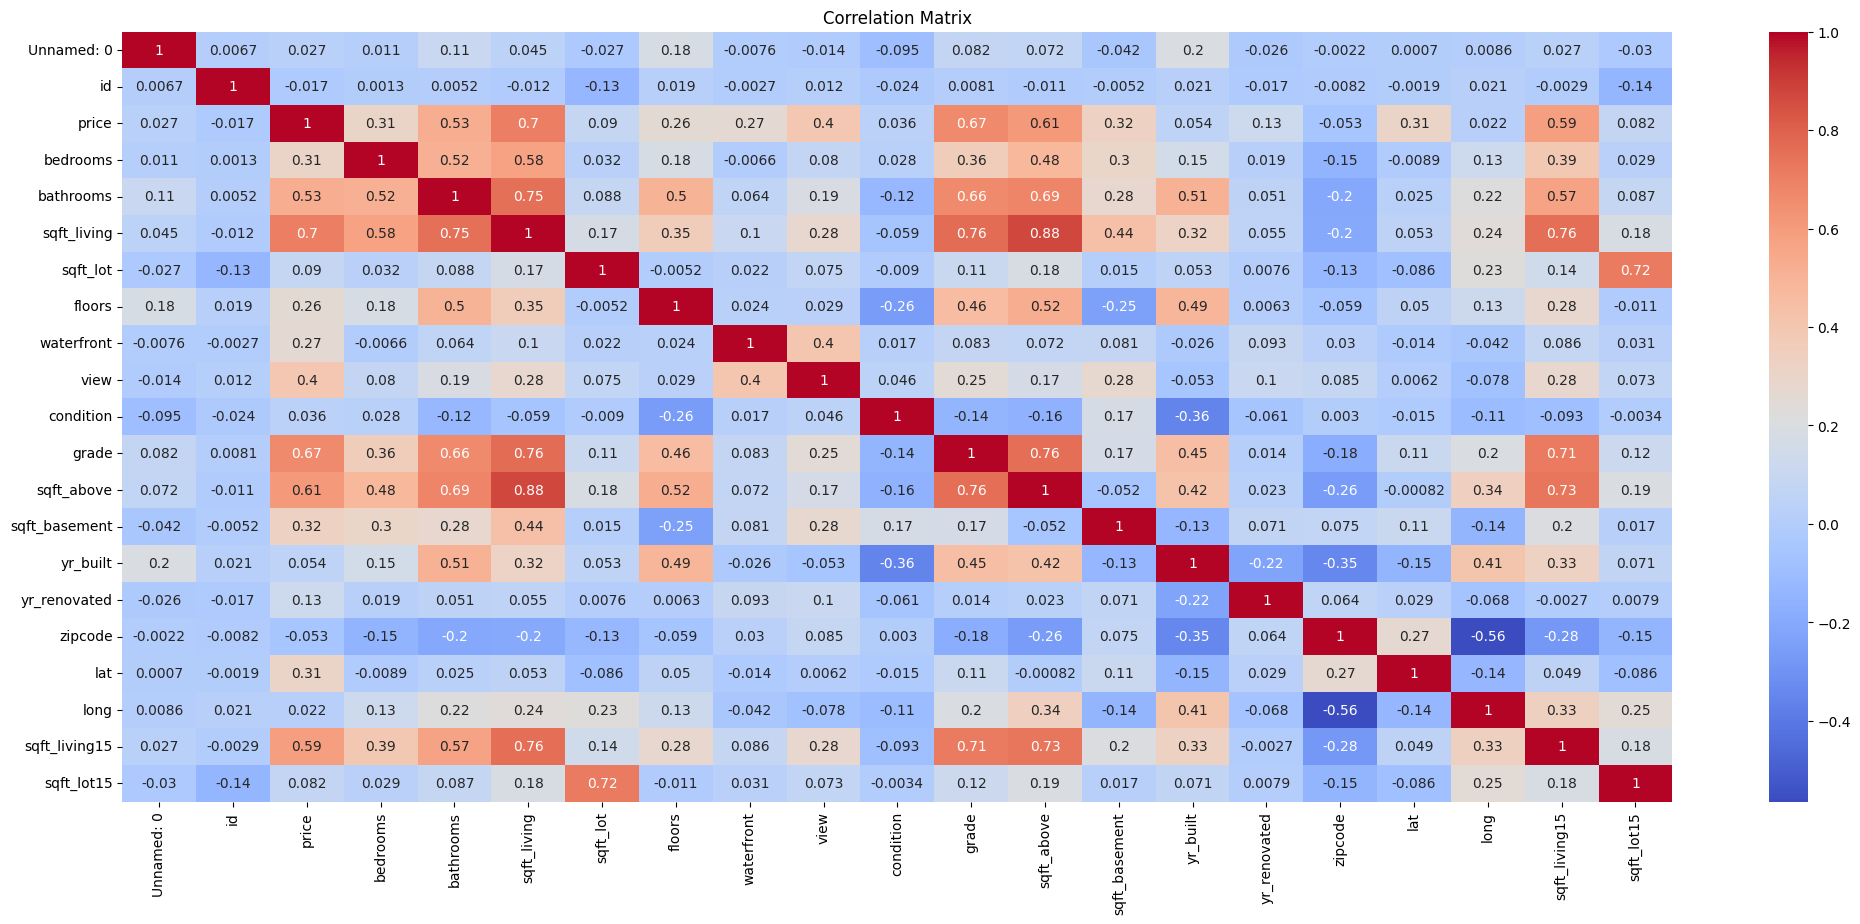

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

     




<ipython-input-13-3e9395b46dd7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corr()["price"].sort_values(ascending=False)


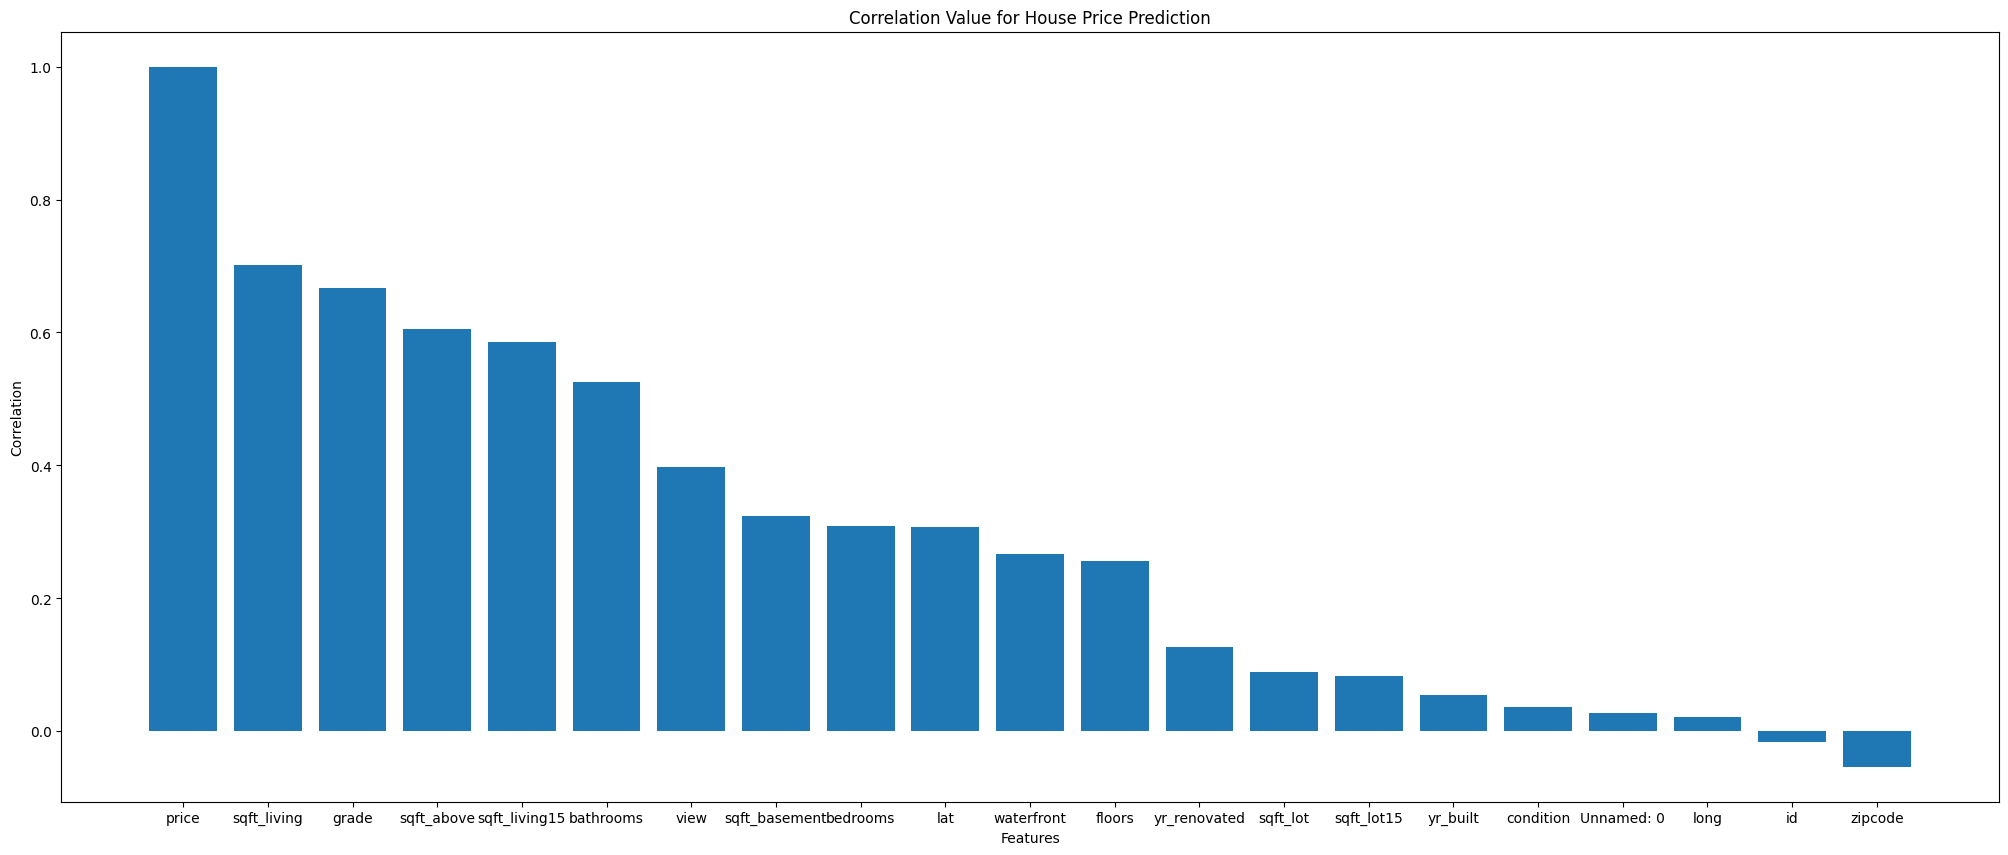

In [13]:
correlations=df.corr()["price"].sort_values(ascending=False)

plt.figure(figsize=(25, 10)) # Set figure size to 10x6 inches
plt.bar(correlations.index, correlations)

plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation Value for House Price Prediction")
plt.show()


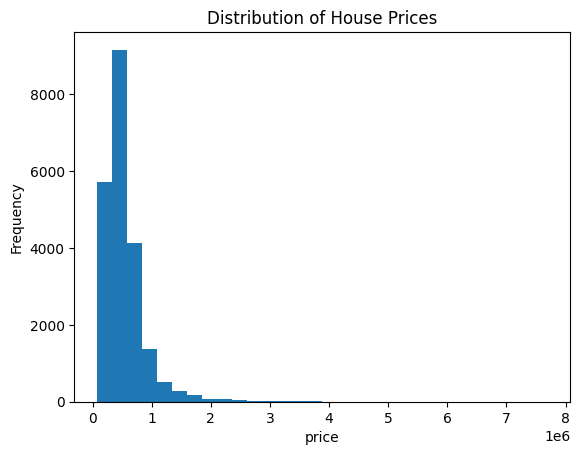

In [14]:
# Histogram of house prices
plt.hist(df['price'], bins=30)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

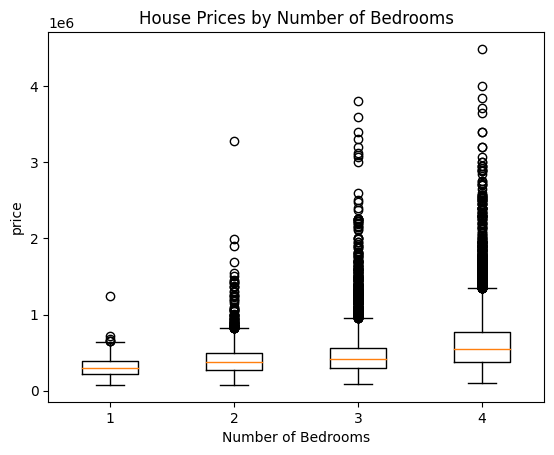

In [30]:
# Relationship between house prices and the number of bedrooms
plt.boxplot([df.loc[df['bedrooms'] == i, 'price'] for i in range(1, 5)])
plt.xticks(range(1, 5), ['1', '2', '3', '4'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('price')
plt.title('House Prices by Number of Bedrooms')
plt.show()


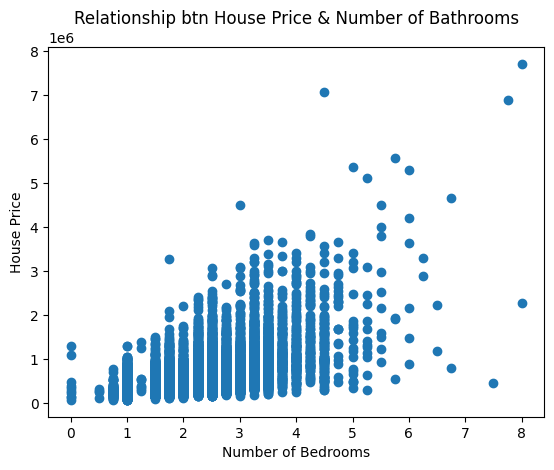

In [31]:
# Relationship between house prices and the number of bathrooms
x = df['bathrooms']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Number of Bathrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price')
plt.show()


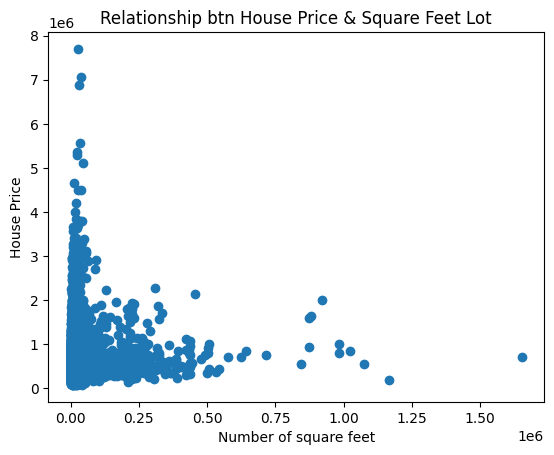

In [32]:
# Relationship between house prices and the square feet of the parking lot
x = df['sqft_lot']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Square Feet Lot')
plt.xlabel('Number of square feet')
plt.ylabel('House Price')
plt.show()


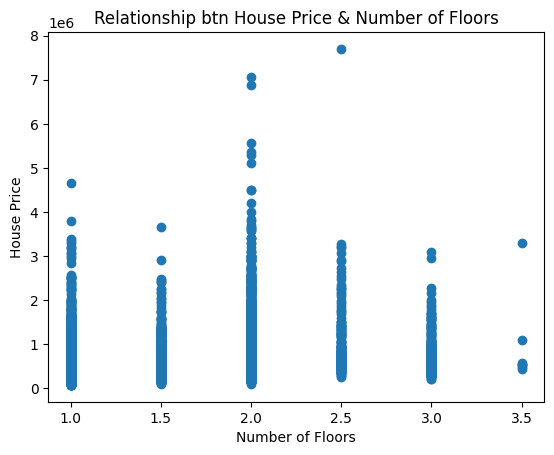

In [33]:
# Relationship between house prices and the number of floors
x = df['floors']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('House Price')
plt.show()


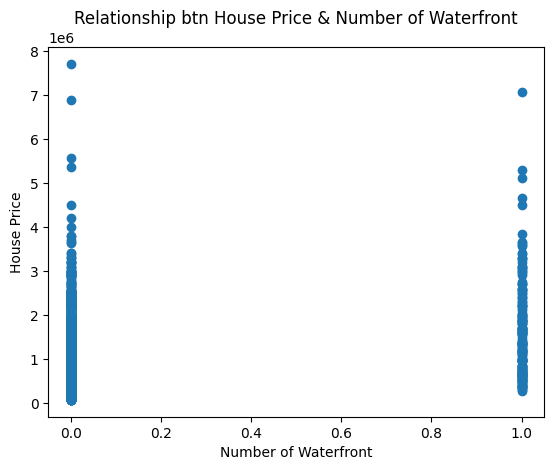

In [34]:
# Relationship between house prices and the number of waterfronts
x = df['waterfront']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Number of Waterfront')
plt.xlabel('Number of Waterfront')
plt.ylabel('House Price')
plt.show()


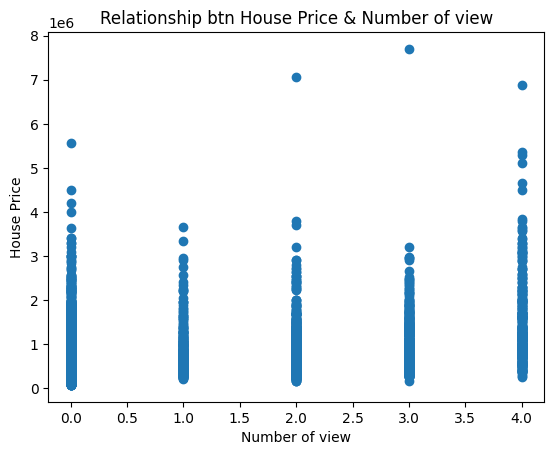

In [35]:
# Relationship between house prices and the number of view
x = df['view']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Number of view')
plt.xlabel('Number of view')
plt.ylabel('House Price')
plt.show()


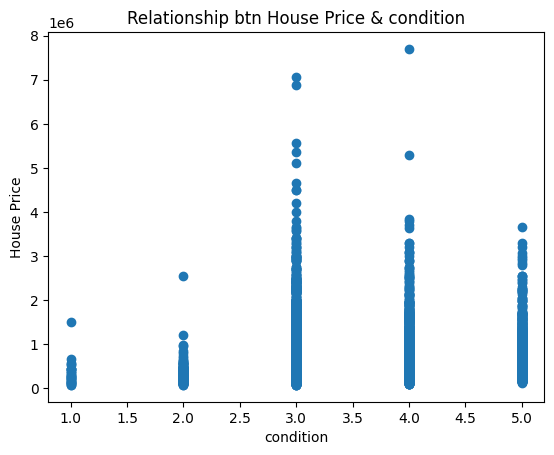

In [36]:
# Relationship between house prices and the condition
x = df['condition']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & condition')
plt.xlabel('condition')
plt.ylabel('House Price')
plt.show()


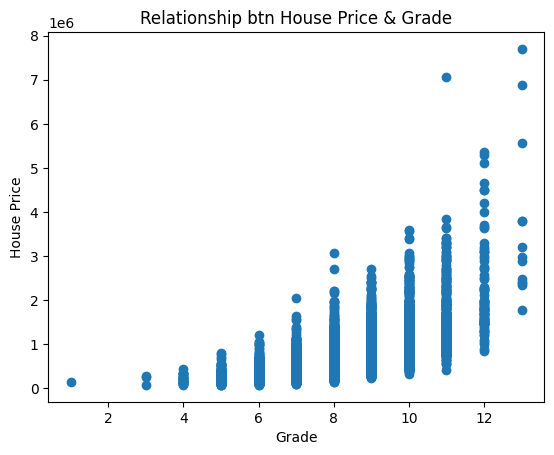

In [37]:
# Relationship between house prices and the grade of the houses
x = df['grade']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Grade')
plt.xlabel('Grade')
plt.ylabel('House Price')
plt.show()


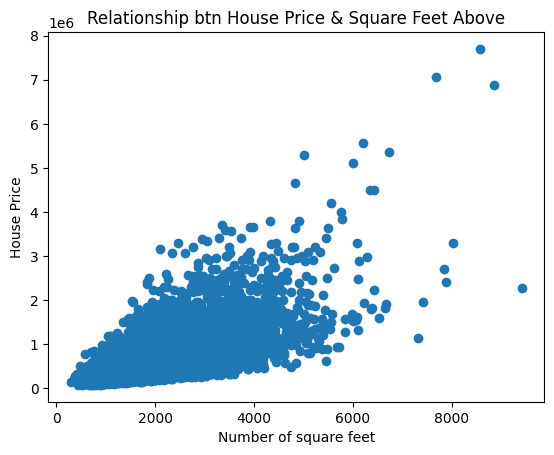

In [38]:
# Relationship between house prices and the number of square feet above
x = df['sqft_above']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Square Feet Above')
plt.xlabel('Number of square feet')
plt.ylabel('House Price')
plt.show()


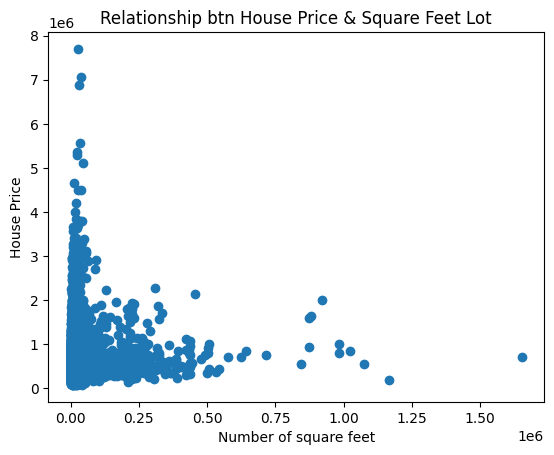

In [39]:
# Relationship between house prices and the number of square feet lot
x = df['sqft_lot']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Square Feet Lot')
plt.xlabel('Number of square feet')
plt.ylabel('House Price')
plt.show()


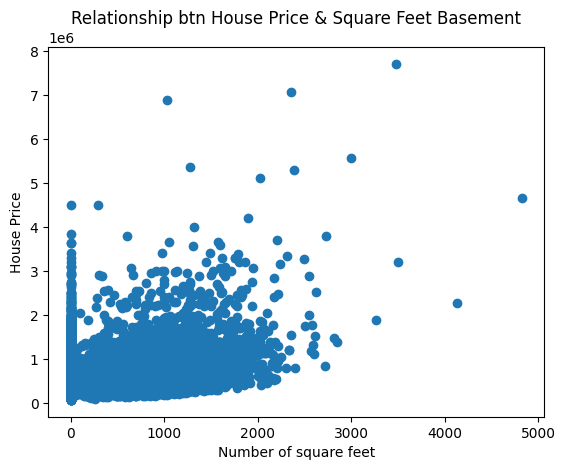

In [40]:
# Relationship between house prices and the number of square feet of basement
x = df['sqft_basement']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Square Feet Basement')
plt.xlabel('Number of square feet')
plt.ylabel('House Price')
plt.show()


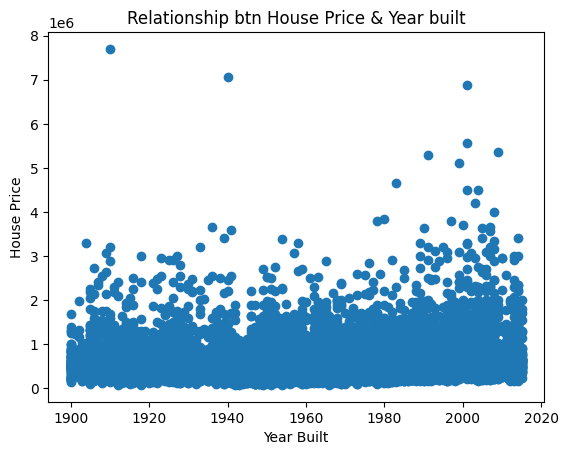

In [41]:
# Relationship between house prices and the year built
x = df['yr_built']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Year built')
plt.xlabel('Year Built')
plt.ylabel('House Price')
plt.show()


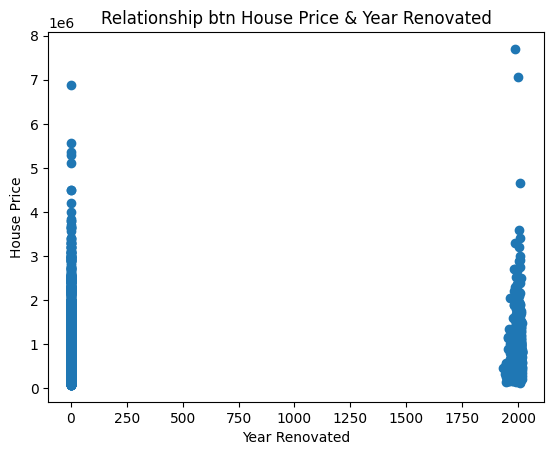

In [42]:
# Relationship between house prices and the year renovated
x = df['yr_renovated']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Year Renovated')
plt.xlabel('Year Renovated')
plt.ylabel('House Price')
plt.show()

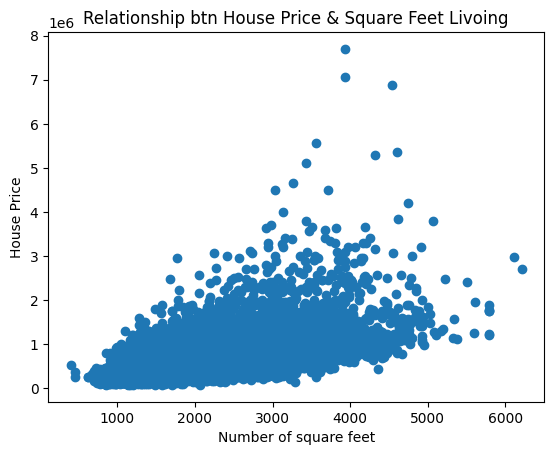

In [43]:
# Relationship between house prices and the square feet of living room
x = df['sqft_living15']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Square Feet Livoing')
plt.xlabel('Number of square feet')
plt.ylabel('House Price')
plt.show()


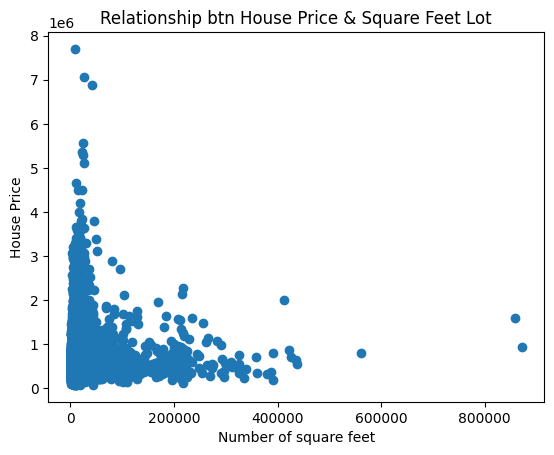

In [44]:
# Relationship between house prices and the square feet of parking
x = df['sqft_lot15']
y = df['price']
plt.scatter(x, y)
plt.title('Relationship btn House Price & Square Feet Lot')
plt.xlabel('Number of square feet')
plt.ylabel('House Price')
plt.show()


In [45]:
# Calculate the mean, standard deviation, and mode
mean = df['price'].mean()
std_dev = df['price'].std()
mode = df['price'].mode()[0]

print("Mean: ", mean)
print("Standard deviation: ", std_dev)
print("Mode: ", mode)

Mean:  540088.1417665294
Standard deviation:  367127.19648269983
Mode:  350000.0


In [46]:
# Calculate the 25th, 50th, and 75th percentiles
p25 = np.percentile(df['price'], 25)
p50 = np.percentile(df['price'], 50)
p75 = np.percentile(df['price'], 75)

print("25th percentile: ", p25)
print("50th percentile: ", p50)
print("75th percentile: ", p75)


25th percentile:  321950.0
50th percentile:  450000.0
75th percentile:  645000.0


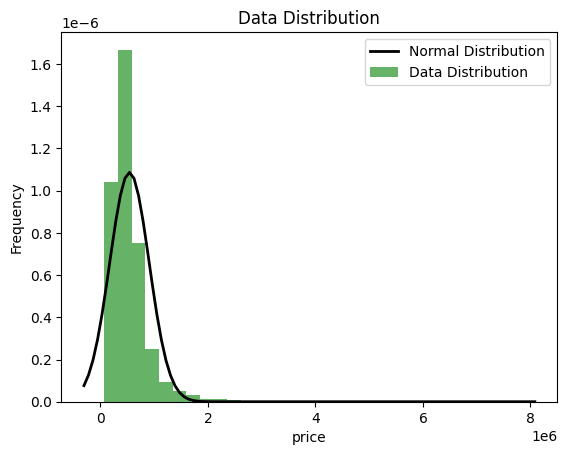

In [48]:
# Plot the data distribution and normal data distribution
plt.hist(df['price'], bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Data Distribution')

# Fit a normal distribution to the data
mu, std = norm.fit(df['price'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.legend(['Normal Distribution', 'Data Distribution'])
plt.show()




In [18]:
# Fit a decision tree modelevaluate their performance using metrics such as mean squared error, mean absolute error, and R-squared.
X = df[['sqft_living', 'bedrooms', 'bathrooms']]
y = df['price']
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(X, y)

# Fit a linear regression model
reg_linear = LinearRegression().fit(X, y)

print("Decision Tree Model R^2 score: ", reg_tree.score(X, y))
print("Linear Regression Model R^2 score: ", reg_linear.score(X, y))

Decision Tree Model R^2 score:  0.8188990382217128
Linear Regression Model R^2 score:  0.5069197973159074


Linear Regression Evaluation Metrics:
Mean Squared Error:  42763452212.7866
Mean Absolute Error:  123716.19188553511
R-squared:  0.6885217836662834

Decision Tree Regression Evaluation Metrics:
Mean Squared Error:  34261362813.972702
Mean Absolute Error:  99776.0778840222
R-squared:  0.7504488616738094


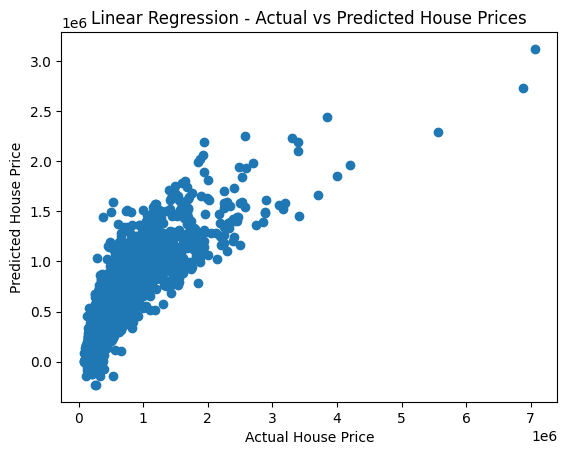

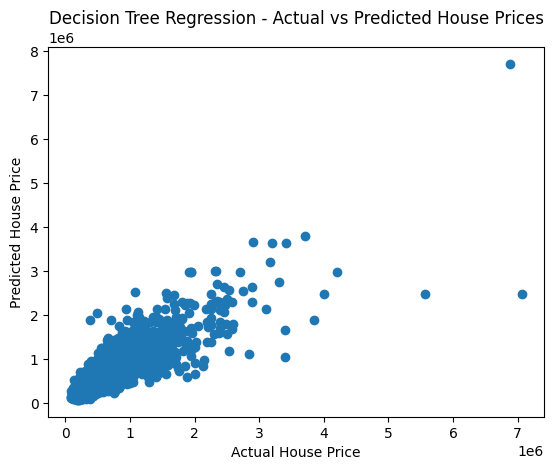

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the linear regression model
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

# Predict the prices using the linear regression model
y_pred = lin_reg.predict(X_test)
# Predict the prices using the linear regression model
y_pred_lin = lin_reg.predict(X_test)

# Calculate the evaluation metrics for the linear regression model
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Evaluation Metrics:")
print("Mean Squared Error: ", mse_lin)
print("Mean Absolute Error: ", mae_lin)
print("R-squared: ", r2_lin)

# Fit the decision tree regression model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Predict the prices using the decision tree regression model
y_pred_tree = tree_reg.predict(X_test)

# Calculate the evaluation metrics for the decision tree regression model
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree Regression Evaluation Metrics:")
print("Mean Squared Error: ", mse_tree)
print("Mean Absolute Error: ", mae_tree)
print("R-squared: ", r2_tree)

# Visualize the predicted and actual house prices using a scatter plot
plt.scatter(y_test, y_pred_lin)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Linear Regression - Actual vs Predicted House Prices')
plt.show()

plt.scatter(y_test, y_pred_tree)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Decision Tree Regression - Actual vs Predicted House Prices')
plt.show()



In [23]:
y_pred = lin_reg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)


        Actual     Predicted
17384   297000  3.943785e+05
722    1578000  1.502469e+06
2680    562100  5.185841e+05
18754   631500  5.781470e+05
14554   780000  9.984026e+05
...        ...           ...
18588  1100000  5.205834e+05
6784    700000  5.473781e+05
14510   380000  3.394741e+05
18917   268000  2.294610e+05
11750   206000  1.673608e+05

[6484 rows x 2 columns]
